In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [2]:
raw_data= np.genfromtxt(r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B4\data\supermarket_sales_vn.csv',delimiter=',',encoding='UTF-8',dtype='str')

In [3]:
title = raw_data[0,:]
data = raw_data[1:,:]

Thực hiện phân tích EDA cho dữ liệu 'supermarket_sales_vn.csv':
1.Thông tin về kích thước, số lượng dòng của tập dữ liệu

In [4]:
print(f'Có {data.shape[0]} dòng và {data.shape[1]} cột')

Có 1000 dòng và 14 cột


2.Tên, ý nghĩa, loại dữ liệu của từng trường dữ liệu

In [5]:
print(title)

['Invoice ID' 'City' 'Customer type' 'Gender' 'Product line' 'Unit price'
 'Quantity' 'Tax 5%' 'Total' 'Date' 'Time' 'Payment' 'cogs' 'Rating']


* Invoice ID: ID của Inv - str
* City: Tên TP - str
* Customer type: Loại khách hàng -str
* Gender: Giới tính - str
* Product line: Loại sp - str
* Unit price: Đơn giá - float
* Quantity: Số lượng - int
* Tax 5%: Thuế - float
* Total: Tổng giá trị - float
* Date: Ngày - datetime64
* Time: Thời gian - datetime64
* Payment: Loại tiền - str
* Cogs - float
* Rating: Đánh giá - float


3. Đơn biến (một cột dữ liệu liên tục: giá, số lượng, tổng đơn, thuế, cogs, rating):
a. Các giá trị thống kê mô tả (min, max, range, mean, meadian, mode (nếu có), 
var, std, quantiles, 95% CI,...)
b. Vẽ biểu đồ phân bố dữ liệu cho từng cột dữ liệu trên

In [6]:
def question(x):
    min = np.min(x)
    max = np.max(x)
    rg = x.shape[0]
    mean = np.mean(x)
    median = np.median(x)
    value,ind = np.unique(x,return_counts=True)
    mode = value[np.where(ind==np.max(ind))]
    var = np.var(x)
    standard = np.std(x)
    pv = np.quantile(x, [0.95])[0]
    return f'Min = {min:.2f}\nMax = {max:.2f}\nRange = {rg}\nMedian = {median:.2f}\nMean = {mean:.2f}\nMode = {list(mode)}\nVar = {var:.2f}\nStandard = {standard:.2f}\nPhân vị theo %(95) : {pv}'

In [7]:
gia = data[:,5].astype(float)
sl = data[:,6].astype(float)
tong_don = data[:,8].astype(float)
thue = data[:,7].astype(float)
cog = data[:,12].astype(float)
rating = data[:,13].astype(float)

In [8]:
print(f'Thống kê giá\n{question(gia)}\nThống kê số lượng\n{question(sl)}\nThống kê tổng đơn\n{question(tong_don)}\nThống kê thuế\n{question(thue)}\nThống kê cogs\n{question(cog)}\nThống kê rating\n{question(rating)}')

Thống kê giá
Min = 10.08
Max = 99.96
Range = 1000
Median = 55.23
Mean = 55.67
Mode = [83.77]
Var = 701.26
Standard = 26.48
Phân vị theo %(95) : 97.222
Thống kê số lượng
Min = 1.00
Max = 10.00
Range = 1000
Median = 5.00
Mean = 5.51
Mode = [10.0]
Var = 8.54
Standard = 2.92
Phân vị theo %(95) : 10.0
Thống kê tổng đơn
Min = 10.68
Max = 1042.65
Range = 1000
Median = 253.85
Mean = 322.97
Mode = [87.234, 93.744, 175.917, 189.0945, 216.846, 217.6335, 263.97, 276.948, 470.988, 829.08]
Var = 60399.14
Standard = 245.76
Phân vị theo %(95) : 822.4964999999997
Thống kê thuế
Min = 0.51
Max = 49.65
Range = 1000
Median = 12.09
Mean = 15.38
Mode = [4.154, 4.464, 8.377, 9.0045, 10.326, 10.3635, 12.57, 13.188, 22.428, 39.48]
Var = 136.96
Standard = 11.70
Phân vị theo %(95) : 39.16649999999999
Thống kê cogs
Min = 10.17
Max = 993.00
Range = 1000
Median = 241.76
Mean = 307.59
Mode = [83.08, 89.28, 167.54, 180.09, 206.52, 207.27, 251.4, 263.76, 448.56, 789.6]
Var = 54783.80
Standard = 234.06
Phân vị theo %(95

Vẽ biểu đồ phân bố dữ liệu cho từng cột dữ liệu trên

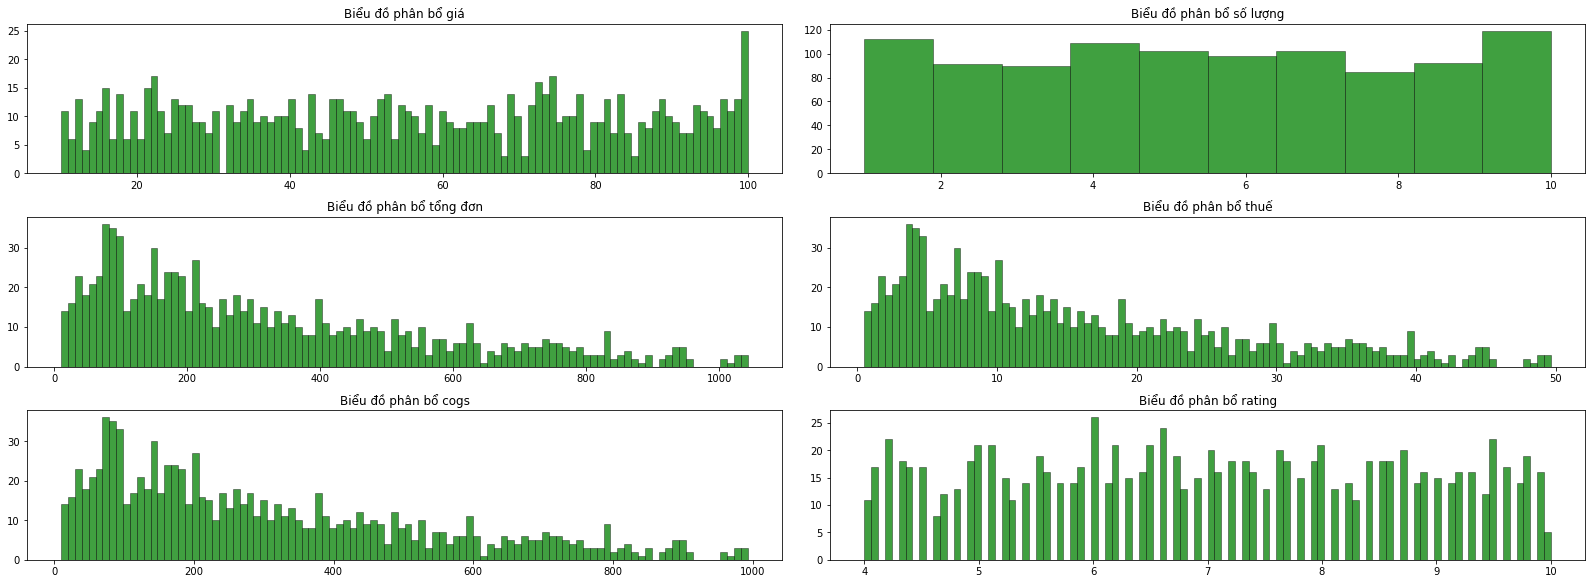

In [9]:
figure, ax = plt.subplots(3,2,figsize=(22,8), constrained_layout=True)
ax[0][0].hist(gia, bins=100, color='green', alpha=.75, edgecolor='black', linewidth=0.5, label = 'Giá đpưn hàng')
ax[0][0].set_title('Biểu đồ phân bổ giá')
ax[0][1].hist(sl, bins=10, color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax[0][1].set_title('Biểu đồ phân bổ số lượng')
ax[1][0].hist(tong_don, bins=100, color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax[1][0].set_title('Biểu đồ phân bổ tổng đơn')
ax[1][1].hist(thue, bins=100, color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax[1][1].set_title('Biểu đồ phân bổ thuế')
ax[2][0].hist(cog, bins=100, color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax[2][0].set_title('Biểu đồ phân bổ cogs')
ax[2][1].hist(rating, bins=100, color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax[2][1].set_title('Biểu đồ phân bổ rating')

plt.show()

Đơn biến (các cột dữ liệu định danh):
a. Đếm số đơn hàng theo chi nhánh, giới tính, loại sản phẩm
b. Vẽ biểu đồ cột, tròn hoặc tree-map cho các thông số trên

In [10]:
print(title)

['Invoice ID' 'City' 'Customer type' 'Gender' 'Product line' 'Unit price'
 'Quantity' 'Tax 5%' 'Total' 'Date' 'Time' 'Payment' 'cogs' 'Rating']


In [11]:
city = data[:,1]
v_area, c_area = np.unique(city, return_counts=True)
print(f'Khu vực {v_area} lần lượt số đơn là {c_area}')
gender = data[:,3]
v_gen, c_gen = np.unique(gender, return_counts=True)
print(f'Giới tính {v_gen} lần lượt số đơn là {c_gen}')
Product_line = data[:,4]
v_pl, c_pl = np.unique(Product_line, return_counts=True)
print(f'Loại SP {v_pl} lần lượt số đơn là {c_pl}')

Khu vực ['Hà Nội' 'TP HCM' 'Đà Nẵng'] lần lượt số đơn là [274 490 236]
Giới tính ['Nam' 'Nữ'] lần lượt số đơn là [499 501]
Loại SP ['Electronic accessories' 'Fashion accessories' 'Food and beverages'
 'Health and beauty' 'Home and lifestyle' 'Sports and travel'] lần lượt số đơn là [170 178 174 152 160 166]


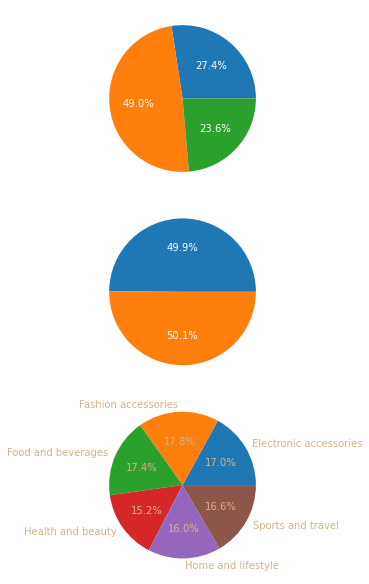

In [37]:
figure, ax = plt.subplots(3,1,figsize=(8,8), constrained_layout=True)
ax[0].pie(c_area, labels = v_area,autopct='%1.1f%%',textprops = dict(color ="white"))
ax[1].pie(c_gen, labels = v_gen,autopct='%1.1f%%',textprops = dict(color ="white"))
ax[2].pie(c_pl, labels = v_pl,autopct='%1.1f%%',textprops = dict(color ="tan"))
plt.show()

Đa biến (kết hợp các cột dữ liệu định danh và liên tục):
a. Thực hiện lại câu hỏi thứ 3 cho từng chi nhánh, giới tính, phân loại khách hàng

In [13]:
def question_1(x,i,y):
    v = x[np.where(data[:,i]==y)]
    min = np.min(v)
    max = np.max(v)
    rg = v.shape[0]
    mean = np.mean(v)
    median = np.median(v)
    value,ind = np.unique(v,return_counts=True)
    mode = value[np.where(ind==np.max(ind))]
    var = np.var(v)
    standard = np.std(v)
    pv = np.quantile(v, [0.95])[0]
    return f'Min = {min:.2f}\nMax = {max:.2f}\nRange = {rg}\nMedian = {median:.2f}\nMean = {mean:.2f}\nMode = {list(mode)}\nVar = {var:.2f}\nStandard = {standard:.2f}\nPhân vị theo %(95) : {pv:.2f}'

In [14]:
# Giá
print("\033[93m {}\033[00m".format('Giá theo khu vực'))
print("\033[93m {}\033[00m".format('Hà nội'))
print(question_1(gia, 1,'Hà Nội'))
print("\033[93m {}\033[00m".format('TP HCM'))
print(question_1(gia, 1,'TP HCM'))
print("\033[93m {}\033[00m".format('Đà Nẵng'))
print(question_1(gia, 1,'Đà Nẵng'))
# SL
print("\033[93m {}\033[00m".format('SL theo khu vực'))
print("\033[93m {}\033[00m".format('Hà nội'))
print(question_1(sl, 1,'Hà Nội'))
print("\033[93m {}\033[00m".format('TP HCM'))
print(question_1(sl, 1,'TP HCM'))
print("\033[93m {}\033[00m".format('Đà Nẵng'))
print(question_1(sl, 1,'Đà Nẵng'))
# Tổng đơn
print("\033[93m {}\033[00m".format('Tổng đơn theo khu vực'))
print("\033[93m {}\033[00m".format('Hà nội'))
print(question_1(tong_don, 1,'Hà Nội'))
print("\033[93m {}\033[00m".format('TP HCM'))
print(question_1(tong_don, 1,'TP HCM'))
print("\033[93m {}\033[00m".format('Đà Nẵng'))
print(question_1(tong_don, 1,'Đà Nẵng'))
# Thuế
print("\033[93m {}\033[00m".format('Thuế theo khu vực'))
print("\033[93m {}\033[00m".format('Hà nội'))
print(question_1(thue, 1,'Hà Nội'))
print("\033[93m {}\033[00m".format('TP HCM'))
print(question_1(thue, 1,'TP HCM'))
print("\033[93m {}\033[00m".format('Đà Nẵng'))
print(question_1(thue, 1,'Đà Nẵng'))
# Cogs
print("\033[93m {}\033[00m".format('Cogs theo khu vực'))
print("\033[93m {}\033[00m".format('Hà nội'))
print(question_1(cog, 1,'Hà Nội'))
print("\033[93m {}\033[00m".format('TP HCM'))
print(question_1(cog, 1,'TP HCM'))
print("\033[93m {}\033[00m".format('Đà Nẵng'))
print(question_1(cog, 1,'Đà Nẵng'))
# Rating
print("\033[93m {}\033[00m".format('Rating theo khu vực'))
print("\033[93m {}\033[00m".format('Hà nội'))
print(question_1(rating, 1,'Hà Nội'))
print("\033[93m {}\033[00m".format('TP HCM'))
print(question_1(rating, 1,'TP HCM'))
print("\033[93m {}\033[00m".format('Đà Nẵng'))
print(question_1(rating, 1,'Đà Nẵng'))

 Giá theo khu vực
 Hà nội
Min = 10.08
Max = 99.83
Range = 274
Median = 57.30
Mean = 56.13
Mode = [32.25, 34.42, 45.58, 48.63, 51.34, 73.47]
Var = 671.92
Standard = 25.92
Phân vị theo %(95) : 96.86
 TP HCM
Min = 10.16
Max = 99.96
Range = 490
Median = 54.29
Mean = 55.49
Mode = [21.12, 24.74, 30.61, 37.15, 38.6, 39.75, 52.42, 65.94, 72.88, 98.7, 99.69, 99.82]
Var = 735.10
Standard = 27.11
Phân vị theo %(95) : 97.44
 Đà Nẵng
Min = 10.59
Max = 99.96
Range = 236
Median = 54.95
Mean = 55.52
Mode = [18.08, 40.3, 52.89]
Var = 664.74
Standard = 25.78
Phân vị theo %(95) : 96.12
 SL theo khu vực
 Hà nội
Min = 1.00
Max = 10.00
Range = 274
Median = 5.00
Mean = 5.33
Mode = [5.0]
Var = 8.03
Standard = 2.83
Phân vị theo %(95) : 10.00
 TP HCM
Min = 1.00
Max = 10.00
Range = 490
Median = 6.00
Mean = 5.63
Mode = [10.0]
Var = 8.69
Standard = 2.95
Phân vị theo %(95) : 10.00
 Đà Nẵng
Min = 1.00
Max = 10.00
Range = 236
Median = 5.00
Mean = 5.47
Mode = [3.0]
Var = 8.75
Standard = 2.96
Phân vị theo %(95) : 10.00

In [15]:
# Giá
print("\033[93m {}\033[00m".format('Giá theo giới tính'))
print("\033[93m {}\033[00m".format('Nam'))
print(question_1(gia, 3,'Nam'))
print("\033[93m {}\033[00m".format('Nữ'))
print(question_1(gia, 3,'Nữ'))
# SL
print("\033[93m {}\033[00m".format('SL theo giới tính'))
print("\033[93m {}\033[00m".format('Nam'))
print(question_1(sl, 3,'Nam'))
print("\033[93m {}\033[00m".format('Nữ'))
print(question_1(sl, 3,'Nữ'))
# Tổng đơn
print("\033[93m {}\033[00m".format('Tổng đơn theo giới tính'))
print("\033[93m {}\033[00m".format('Nam'))
print(question_1(tong_don, 3,'Nam'))
print("\033[93m {}\033[00m".format('Nữ'))
print(question_1(tong_don, 3,'Nữ'))
# Thuế
print("\033[93m {}\033[00m".format('Thuế theo giới tính'))
print("\033[93m {}\033[00m".format('Nam'))
print(question_1(thue, 3,'Nam'))
print("\033[93m {}\033[00m".format('Nữ'))
print(question_1(thue, 3,'Nữ'))
# Cogs
print("\033[93m {}\033[00m".format('Cogs theo giới tính'))
print("\033[93m {}\033[00m".format('Nam'))
print(question_1(cog, 3,'Nam'))
print("\033[93m {}\033[00m".format('Nữ'))
print(question_1(cog, 3,'Nữ'))
# Rating
print("\033[93m {}\033[00m".format('Rating theo giới tính'))
print("\033[93m {}\033[00m".format('Nam'))
print(question_1(rating, 3,'Nam'))
print("\033[93m {}\033[00m".format('Nữ'))
print(question_1(rating, 3,'Nữ'))

 Giá theo giới tính
 Nam
Min = 10.08
Max = 99.96
Range = 499
Median = 56.50
Mean = 56.08
Mode = [21.58, 30.61, 34.56, 51.34, 51.94, 52.89, 60.3, 65.94, 75.88, 76.4, 83.77, 87.87, 99.82, 99.96]
Var = 664.00
Standard = 25.77
Phân vị theo %(95) : 97.00
 Nữ
Min = 10.16
Max = 99.73
Range = 501
Median = 54.07
Mean = 55.26
Mode = [15.8, 19.15, 20.01, 22.32, 26.26, 34.42, 39.62, 68.71, 73.05, 73.47, 77.68, 84.05, 99.69]
Var = 738.04
Standard = 27.17
Phân vị theo %(95) : 97.37
 SL theo giới tính
 Nam
Min = 1.00
Max = 10.00
Range = 499
Median = 5.00
Mean = 5.29
Mode = [1.0]
Var = 8.67
Standard = 2.94
Phân vị theo %(95) : 10.00
 Nữ
Min = 1.00
Max = 10.00
Range = 501
Median = 6.00
Mean = 5.73
Mode = [10.0]
Var = 8.31
Standard = 2.88
Phân vị theo %(95) : 10.00
 Tổng đơn theo giới tính
 Nam
Min = 10.68
Max = 1039.29
Range = 499
Median = 244.23
Mean = 310.79
Mode = [87.234, 175.917, 276.948]
Var = 58457.13
Standard = 241.78
Phân vị theo %(95) : 808.33
 Nữ
Min = 12.69
Max = 1042.65
Range = 501
Median 

In [16]:
# Giá
print("\033[93m {}\033[00m".format('Giá theo loại khách hàng'))
print("\033[93m {}\033[00m".format('Member'))
print(question_1(gia, 2,'Member'))
print("\033[93m {}\033[00m".format('Normal'))
print(question_1(gia, 2,'Normal'))
# SL
print("\033[93m {}\033[00m".format('SL theo loại khách hàng'))
print("\033[93m {}\033[00m".format('Member'))
print(question_1(sl, 2,'Member'))
print("\033[93m {}\033[00m".format('Normal'))
print(question_1(sl, 2,'Normal'))
# Tổng đơn
print("\033[93m {}\033[00m".format('Tổng đơn theo loại khách hàng'))
print("\033[93m {}\033[00m".format('Member'))
print(question_1(tong_don, 2,'Member'))
print("\033[93m {}\033[00m".format('Normal'))
print(question_1(tong_don, 2,'Normal'))
# Thuế
print("\033[93m {}\033[00m".format('Thuế theo loại khách hàng'))
print("\033[93m {}\033[00m".format('Member'))
print(question_1(thue, 2,'Member'))
print("\033[93m {}\033[00m".format('Normal'))
print(question_1(thue, 2,'Normal'))
# Cogs
print("\033[93m {}\033[00m".format('Cogs theo loại khách hàng'))
print("\033[93m {}\033[00m".format('Member'))
print(question_1(cog, 2,'Member'))
print("\033[93m {}\033[00m".format('Normal'))
print(question_1(cog, 2,'Normal'))
# Rating
print("\033[93m {}\033[00m".format('Rating theo loại khách hàng'))
print("\033[93m {}\033[00m".format('Member'))
print(question_1(rating, 2,'Member'))
print("\033[93m {}\033[00m".format('Normal'))
print(question_1(rating, 2,'Normal'))

 Giá theo loại khách hàng
 Member
Min = 10.08
Max = 99.96
Range = 501
Median = 56.04
Mean = 56.21
Mode = [83.77]
Var = 713.57
Standard = 26.71
Phân vị theo %(95) : 96.82
 Normal
Min = 10.56
Max = 99.96
Range = 499
Median = 54.28
Mean = 55.14
Mode = [15.8, 21.58, 23.75, 30.61, 32.32, 45.38, 52.42, 60.3, 76.4, 84.05, 89.48, 99.69]
Var = 688.33
Standard = 26.24
Phân vị theo %(95) : 97.37
 SL theo loại khách hàng
 Member
Min = 1.00
Max = 10.00
Range = 501
Median = 5.00
Mean = 5.56
Mode = [10.0]
Var = 8.75
Standard = 2.96
Phân vị theo %(95) : 10.00
 Normal
Min = 1.00
Max = 10.00
Range = 499
Median = 5.00
Mean = 5.46
Mode = [6.0, 10.0]
Var = 8.32
Standard = 2.88
Phân vị theo %(95) : 10.00
 Tổng đơn theo loại khách hàng
 Member
Min = 10.68
Max = 1042.65
Range = 501
Median = 266.03
Mean = 327.79
Mode = [93.744, 175.917, 189.0945, 216.846, 276.948, 829.08]
Var = 61378.16
Standard = 247.75
Phân vị theo %(95) : 829.08
 Normal
Min = 12.69
Max = 1039.29
Range = 499
Median = 237.43
Mean = 318.12
Mod

b. So sánh tổng đơn theo phân loại sản phẩm

In [17]:
print(title)

['Invoice ID' 'City' 'Customer type' 'Gender' 'Product line' 'Unit price'
 'Quantity' 'Tax 5%' 'Total' 'Date' 'Time' 'Payment' 'cogs' 'Rating']


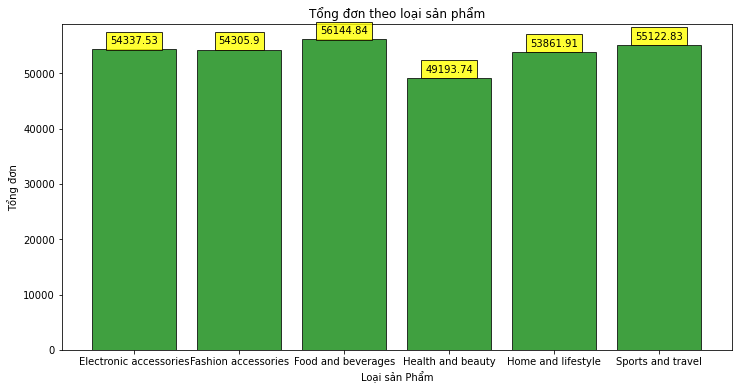

In [18]:
x = np.unique(data[:,4])
y = data[:,8].astype(float)
sum = [y[data[:,4] == i].sum() for i in x]
plt.figure(figsize = (12,6))
plt.bar(x,sum, color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
for i in range(len(x)):
    plt.text(i,sum[i]+1000,np.round(sum[i],2),ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.8))
plt.title('Tổng đơn theo loại sản phẩm')
plt.xlabel('Loại sản Phẩm')
plt.ylabel('Tổng đơn')
plt.autoscale()
plt.show()

6.Trả lời các câu hỏi sau:
a. Khung giờ bán được nhiều đơn nhất
b. Khung giờ có doanh thu cao nhất
c. Top5 mặt hàng bán được nhiều nhất (theo số lượng)
d. Top5 mặt hàng có doanh thu cao nhất

In [19]:
ID = data[:,0]
tong_don = data[:,8].astype(float)
time = data[:,10]
hours = np.array([i[0:2] for i in time])
hour, count = np.unique(hours, return_counts=True)
# Bán nhiều nhất
besttime_quantity= hour[np.where(count==max(count))][0]
#Doanh thu cao
sum = np.round([tong_don[hours == i].sum() for i in hour],2)
besttime_value = hour[np.where(sum==max(sum))][0]
# Top 5 bán theo SL
quantity = data[:,6].astype(int)
sps = data[:,4]
sp = np.unique(sps)
sum1 = [quantity[sps == i].sum() for i in sp]
top5_quantity = sp[np.argsort(sum1)][0:5]
#Top 5 doanh thu
tongdon = data[:,8].astype(float)
sum2 = [tongdon[sps == i].sum() for i in sp]
top5_value = sp[np.argsort(sum2)][0:5]
print(f'Khung giờ bán nhiều đơn nhất: {besttime_quantity}\nKhung giờ doanh thu cao nhất: {besttime_value}\nTop 5 mặt hàng bán nhiều nhất theo SL: {top5_quantity}\nTop 5 mặt hàng doanh thu cao nhất: {top5_value}')

Khung giờ bán nhiều đơn nhất: 19
Khung giờ doanh thu cao nhất: 19
Top 5 mặt hàng bán nhiều nhất theo SL: ['Health and beauty' 'Fashion accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages']
Top 5 mặt hàng doanh thu cao nhất: ['Health and beauty' 'Home and lifestyle' 'Fashion accessories'
 'Electronic accessories' 'Sports and travel']


7. Phân tích mối tương quan:
a. Giữa giá và rating
b. Giữa số lượng và rating
c. Giữa tổng đơn và rating

In [20]:
from sklearn.metrics import r2_score
print(f'Tương quan giữa giá và rating: {np.corrcoef(gia,rating)[0,1]}')
print(f'Tương quan giữa SL và rating: {np.corrcoef(sl,rating)[0,1]}')
print(f'Tương quan giữa tổng đơn và rating: {np.corrcoef(tong_don,rating)[0,1]}')
print('Mối quan hệ là ngược chiều và mức độ tương quan rất thấp')

Tương quan giữa giá và rating: -0.00877750720077895
Tương quan giữa SL và rating: -0.015814904627166927
Tương quan giữa tổng đơn và rating: -0.036441704997018355
Mối quan hệ là ngược chiều và mức độ tương quan rất thấp


8. Tại sao không quan tâm tới mối tương quan giữa giá và tổng đơn, thuế và số lượng, hay giữa số lượng và cogs?

Vì các biến trên có mối tương quan lẫn nhau, cụ thể:

In [23]:
#Giá và tổng đơn
print(np.corrcoef(gia,tongdon)[0,1])
# print(r2_score(gia,tongdon/sl))
#Thuế và số lượng
print(np.corrcoef(thue,sl)[0,1])
# print(r2_score(thue/gia,sl))
#Số lượng và cogs
print(np.corrcoef(sl,cog)[0,1])
# print(r2_score(sl,cog/gia))
print('Hệ số tương quan khá cao là ~0.7 khá gần 1 nên không thể đưa vào mô hình phân tích' )

0.6339620885890689
0.7055101859433063
0.7055101859433066
Hệ số tương quan khá cao là ~0.7 khá gần 1 nên không thể đưa vào mô hình phân tích
